<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

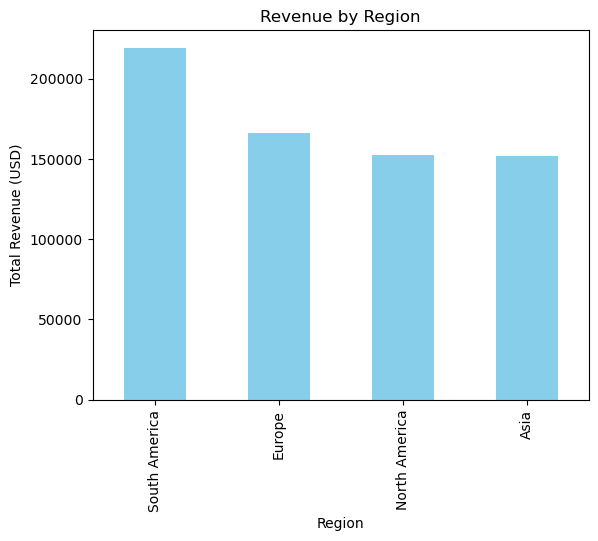

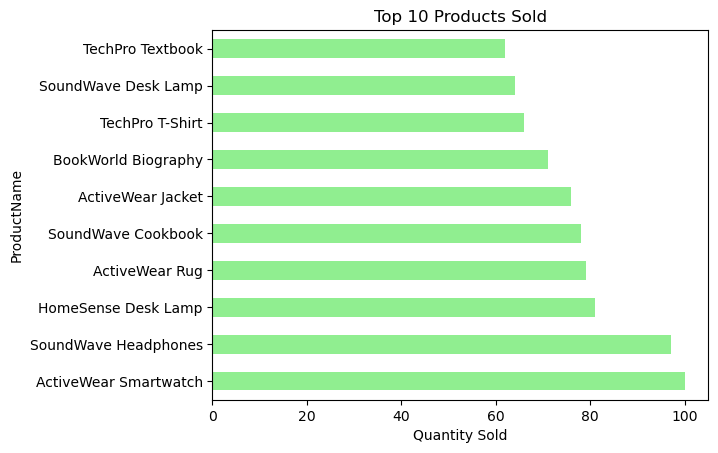

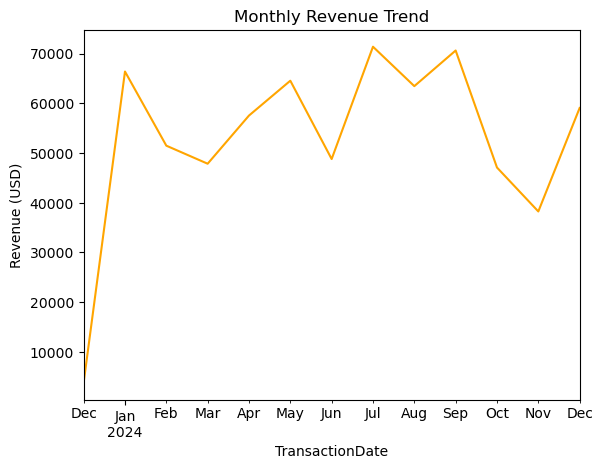

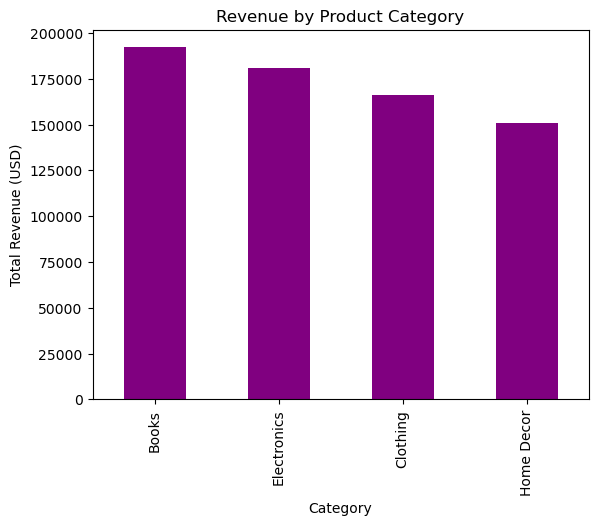

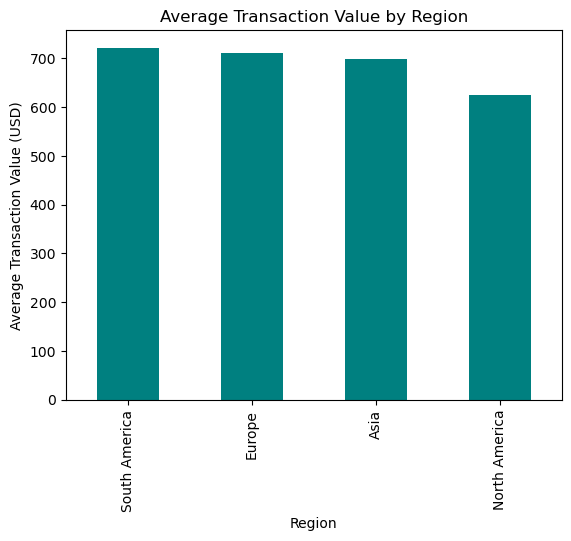

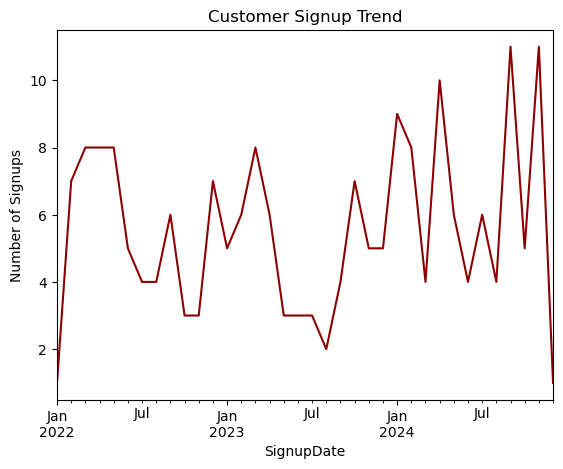

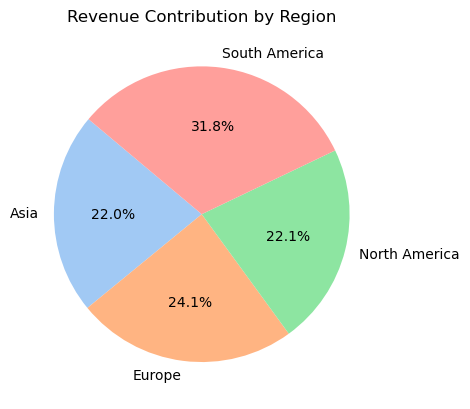

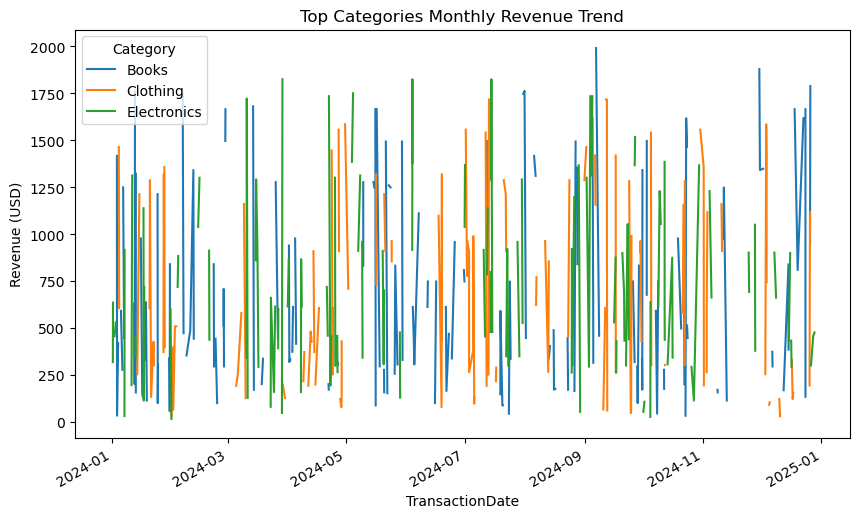

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


print(customers.info())
print(products.info())
print(transactions.info())

# Summary statistics
print(merged_data.describe())

# Visualizations
# 1. Transactions by Region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title="Revenue by Region", color="skyblue")
plt.ylabel("Total Revenue (USD)")
plt.show()

# 2. Top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title="Top 10 Products Sold", color="lightgreen")
plt.xlabel("Quantity Sold")
plt.show()

# 3. Transactions over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.set_index('TransactionDate').resample('M')['TotalValue'].sum()
monthly_sales.plot(title="Monthly Revenue Trend", color="orange")
plt.ylabel("Revenue (USD)")
plt.show()

# 4. Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title="Revenue by Product Category", color="purple")
plt.ylabel("Total Revenue (USD)")
plt.show()

# 5. Average Transaction Value by Region
avg_transaction_region = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
avg_transaction_region.plot(kind='bar', title="Average Transaction Value by Region", color="teal")
plt.ylabel("Average Transaction Value (USD)")
plt.show()

# 6. Customer Signup Distribution Over Time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_counts = customers.set_index('SignupDate').resample('M')['CustomerID'].count()
signup_counts.plot(title="Customer Signup Trend", color="darkred")
plt.ylabel("Number of Signups")
plt.show()

# Pie chart for revenue contribution by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, title="Revenue Contribution by Region", colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.show()

# Revenue trend for top product categories
top_categories = merged_data.groupby('Category')['TotalValue'].sum().nlargest(3).index
filtered_data = merged_data[merged_data['Category'].isin(top_categories)]
category_monthly_sales = filtered_data.groupby(['TransactionDate', 'Category'])['TotalValue'].sum().unstack()
category_monthly_sales.plot(figsize=(10, 6), title="Top Categories Monthly Revenue Trend")
plt.ylabel("Revenue (USD)")
plt.show()

